In [1]:

import json
import pickle
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:

with open("../data/rotten_tomatoes_movies_data_with_score_panels.json", "r") as fp:
    data = json.load(fp)
    
print(len(data))


4486


# Movie_Data_2k:

- This is smallest, yet most comprehensive version of the collected information w.r.t. to the comprehensiveness of columns related to features and network data

In [3]:


issues = []
errors = []


for k, v in data.items():
    try:
        run_time =  int(v['Info']['Runtime'].split()[0].split("h")[0]) * 60 + int(v['Info']['Runtime'].split()[1].split("m")[0])
        tmp_box_office = v['Info']['Box Office (Gross USA)'].strip().split("$")[1]
        
        if "M" in tmp_box_office:
            box_office = float(tmp_box_office.split("M")[0]) * 1000000
        elif "K" in tmp_box_office:
            box_office = float(tmp_box_office.split("K")[0]) * 1000
        else:
            box_office = 0.
        a_row = pd.Series({
            'Title': v['Title'].strip(),
            'Synopsis': v['Synopsis'], 
            'Original Language': v['Info']['Original Language'].strip(), 
            'Runtime': run_time,
            'Director': v['Info']['Director'].strip(), 
            'Producer': v['Info']['Producer'].strip(), 
            'Writer':  v['Info']['Writer'].strip(),
            'Top Cast': v["Top Cast"], 
            'Distributor': v['Info']['Distributor'].strip(),
            'Production Co': v['Info']['Production Co'].strip(),
            'Box Office (Gross USA)': box_office, 
            'Tomato Meter': float(v["Score Panel"][2].strip("%"))/100,
            'Audience Score': float(v["Score Panel"][5].strip("%"))/100,
            'No. Reviews': int(v["Score Panel"][4].split(" ")[0]),
            'All Genres': v['Info']['Genre'].strip(), 
            'Genre': v['Info']['Genre'].strip().split(", ")[0],
            'Release Date (Theaters)': v['Info']['Release Date (Theaters)'].strip(),
            'Release Date (Streaming)': v['Info']['Release Date (Streaming)'].strip(), 
            'Link': k.strip()
        })

    except Exception as error:
        print(
            f"In {k} \n"
            f"{error} \n"
            f"occurred !"
        )
        issues.append(k)
        errors.append(error)
        
        
                

In https://www.rottentomatoes.com/m/the_promised_land_2023
 
'Info' 
occurred !
In https://www.rottentomatoes.com/m/society_of_the_snow
 
'Info' 
occurred !
In https://www.rottentomatoes.com/m/argylle
 
'Box Office (Gross USA)' 
occurred !
In https://www.rottentomatoes.com/m/lift_2024
 
'Box Office (Gross USA)' 
occurred !
In https://www.rottentomatoes.com/m/rebel_moon_part_1_a_child_of_fire
 
'Box Office (Gross USA)' 
occurred !
In https://www.rottentomatoes.com/m/the_legend_of_tarzan
 
'Score Panel' 
occurred !
In https://www.rottentomatoes.com/m/the_family_plan
 
'Box Office (Gross USA)' 
occurred !
In https://www.rottentomatoes.com/m/1017666-road_house
 
'Score Panel' 
occurred !
In https://www.rottentomatoes.com/m/dangerous_waters_2023
 
'Box Office (Gross USA)' 
occurred !
In https://www.rottentomatoes.com/m/freelance_2023
 
'Info' 
occurred !
In https://www.rottentomatoes.com/m/the_bricklayer_2023
 
'Box Office (Gross USA)' 
occurred !
In https://www.rottentomatoes.com/m/ghosted

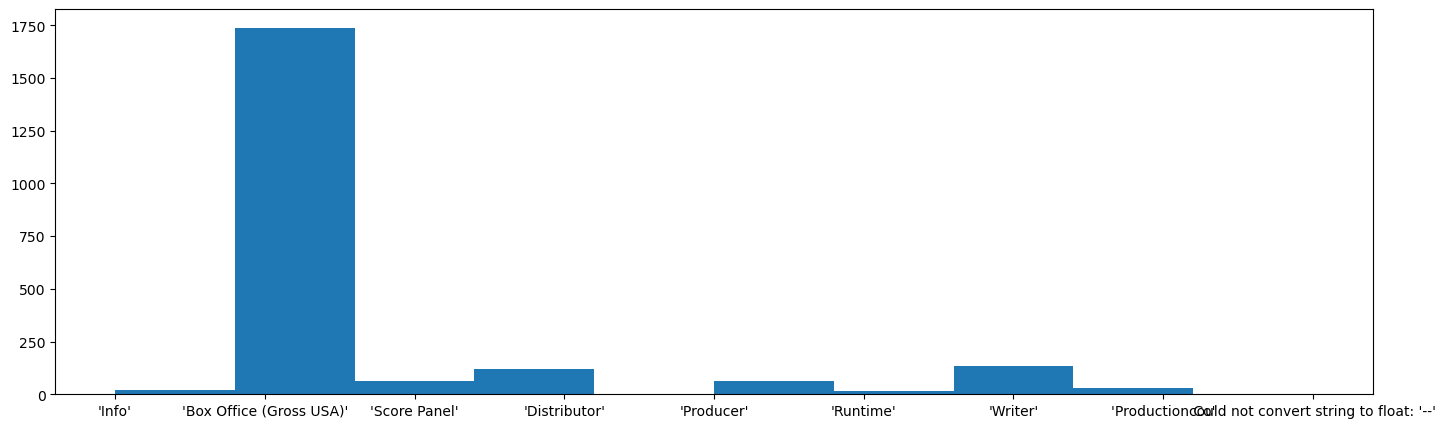

In [4]:

errors = [str(e) for e in errors ]
errors = [str(e) for e in errors if "invalid literal" not in e ]  # remove run-time errors for movies shorter an hour
plt.figure(figsize=(17, 5))
plt.hist(errors)
plt.show()




# Movie_Data_4k:

- The "Box office", "Distributer" , "Production Co.", "Release Date (Theaters)" and "Release Date (Streaming)" are dropped from the set of features to increase the number of data points

- The "Producer" is also drop from the corresponding network columns to increase the number of data points.

In [5]:




issues_4k = []
errors_4k = []


for k, v in data.items():
    try:
        run_time =  int(v['Info']['Runtime'].split()[0].split("h")[0]) * 60 + int(v['Info']['Runtime'].split()[1].split("m")[0])
        a_row = pd.Series({
            'Title': v['Title'].strip(),
            'Synopsis': v['Synopsis'].strip(), 
            'Original Language': v['Info']['Original Language'].strip(), 
            'Runtime': run_time,
            'Director': v['Info']['Director'].strip(), 
            'Top Cast': v["Top Cast"], 
            'Tomato Meter': float(v["Score Panel"][2].strip("%"))/100,
            'Audience Score': float(v["Score Panel"][5].strip("%"))/100,
            'No. Reviews': int(v["Score Panel"][4].split(" ")[0]),
            'All Genres': v['Info']['Genre'].strip(), 
            'Genre': v['Info']['Genre'].strip().split(", ")[0],
            'Link': k.strip()
        })
    except Exception as error:
#         print(
#             f"In {k} \n"
#             f"{error} \n"
#             f"occurred !"
#         )
        issues_4k.append(k)
        errors_4k.append(error)
        
        
                

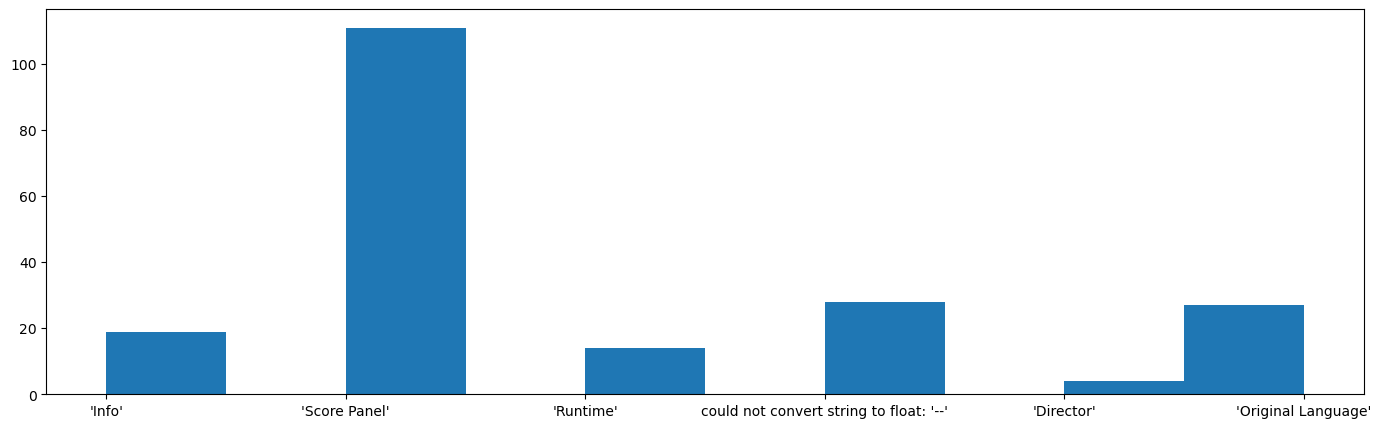

In [6]:

errors_4k = [str(e) for e in errors_4k ]
# removing run errors for movies shorter an hour
errors_4k = [str(e) for e in errors_4k if "invalid literal" not in e ]  

plt.figure(figsize=(17, 5))
plt.hist(errors_4k)
plt.show()




In [7]:

set(errors_4k)


{"'Director'",
 "'Info'",
 "'Original Language'",
 "'Runtime'",
 "'Score Panel'",
 "could not convert string to float: '--'"}

# EDA

In [18]:


medium_movies_data = pd.read_csv("../data/medium_movies_data.csv", )
medium_data_df_a = pd.read_csv("../data/medium_data_df_a.csv", )
medium_data_a = pd.read_csv("../data/medium_data_a.csv", )

print(medium_movies_data.shape, medium_data_df_a.shape, medium_data_a.shape)


(2262, 19) (2231, 2232) (2230, 2231)




## Data with around 2,000 movies



In [39]:


features_s = [
    'Title', 'Synopsis', 'Original Language', 'Runtime', 
    'Director', 'Producer', 'Writer', 'Top Cast',
    'Distributor', 'Production Co', 
    'Box Office (Gross USA)', 
    'Tomato Meter', 'Audience Score', 'No. Reviews', 'Genre', 
    'Release Date (Theaters)', 'Release Date (Streaming)', 'Link'
]

q_features_s = ['Runtime', 'Box Office (Gross USA)', 'Tomato Meter', 'Audience Score', 'No. Reviews', ]

c_features_s = ['Original Language', 'Genre',]

network_columns_s = [ 'Director', 'Producer', 'Writer', 'Top Cast']



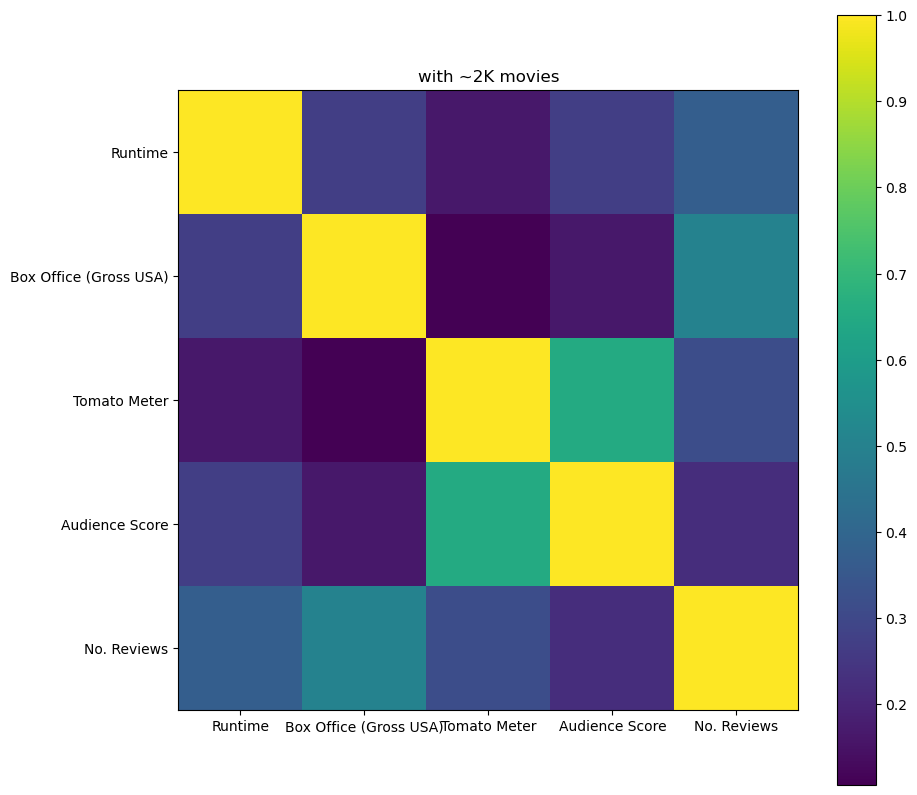

In [10]:



corr_s = medium_movies_data[q_features_s].corr()
plt.figure(figsize=(10, 10))
plt.imshow(corr_s)
plt.xticks(range(len(corr_s.columns)), corr_s.columns)
plt.yticks(range(len(corr_s.columns)), corr_s.columns)
plt.colorbar()
plt.title("with ~2K movies")
plt.show()



In [11]:

medium_movies_data["Genre"].unique()



array(['Musical', 'Action', 'Biography', 'Adventure', 'Sci-fi',
       'Mystery & thriller', 'Horror', 'Comedy', 'Fantasy', 'Drama',
       'Western', 'Romance', 'War', 'Crime', 'Kids & family', 'History',
       'Holiday', 'Documentary'], dtype=object)

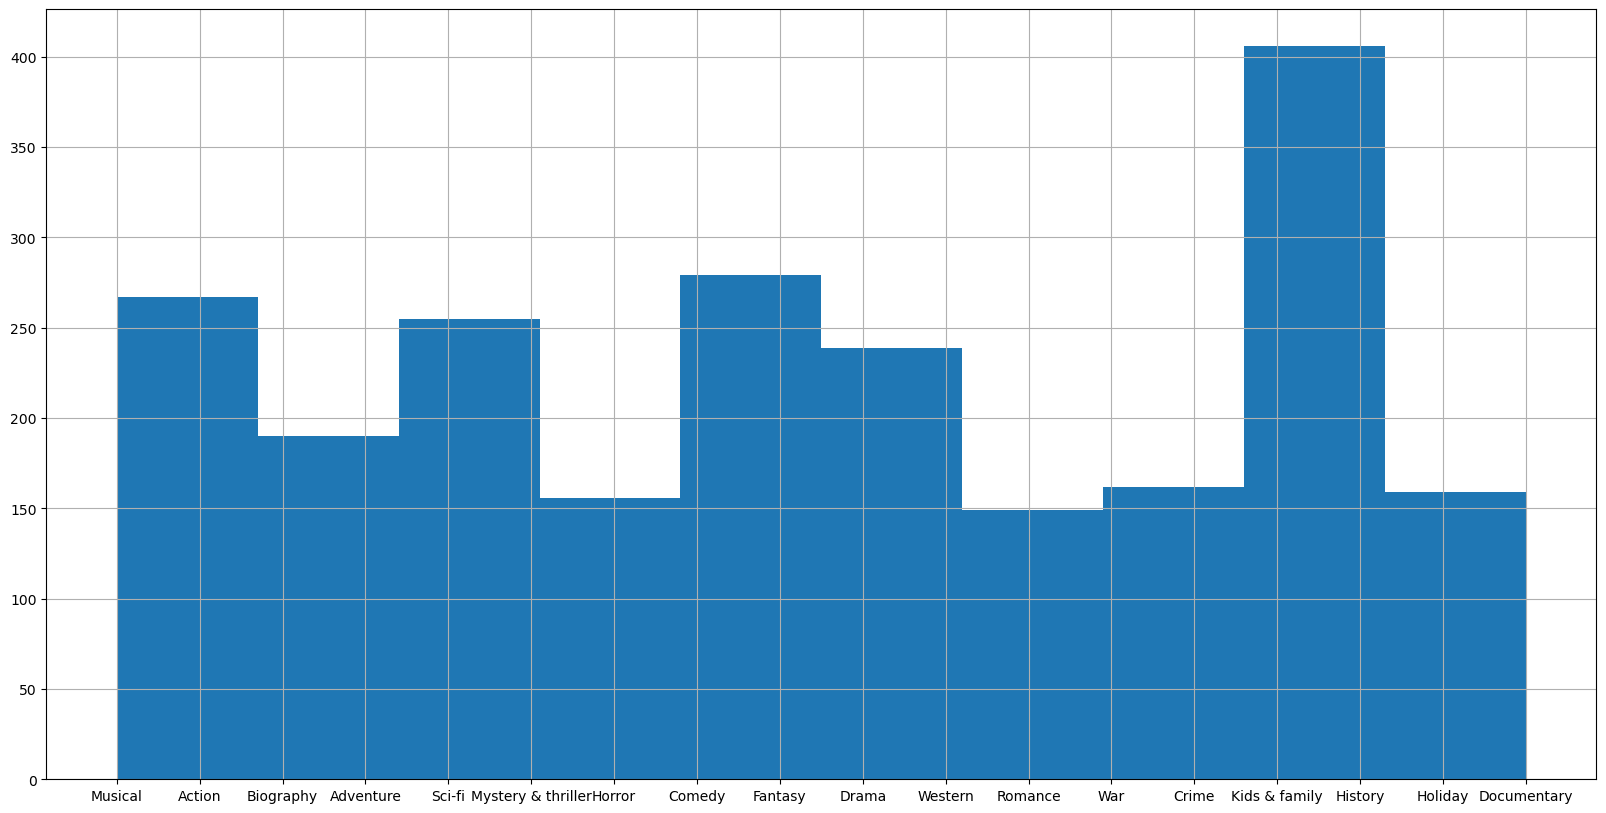

In [12]:

plt.figure(figsize=(20, 10))
medium_movies_data["Genre"].hist()
plt.show()


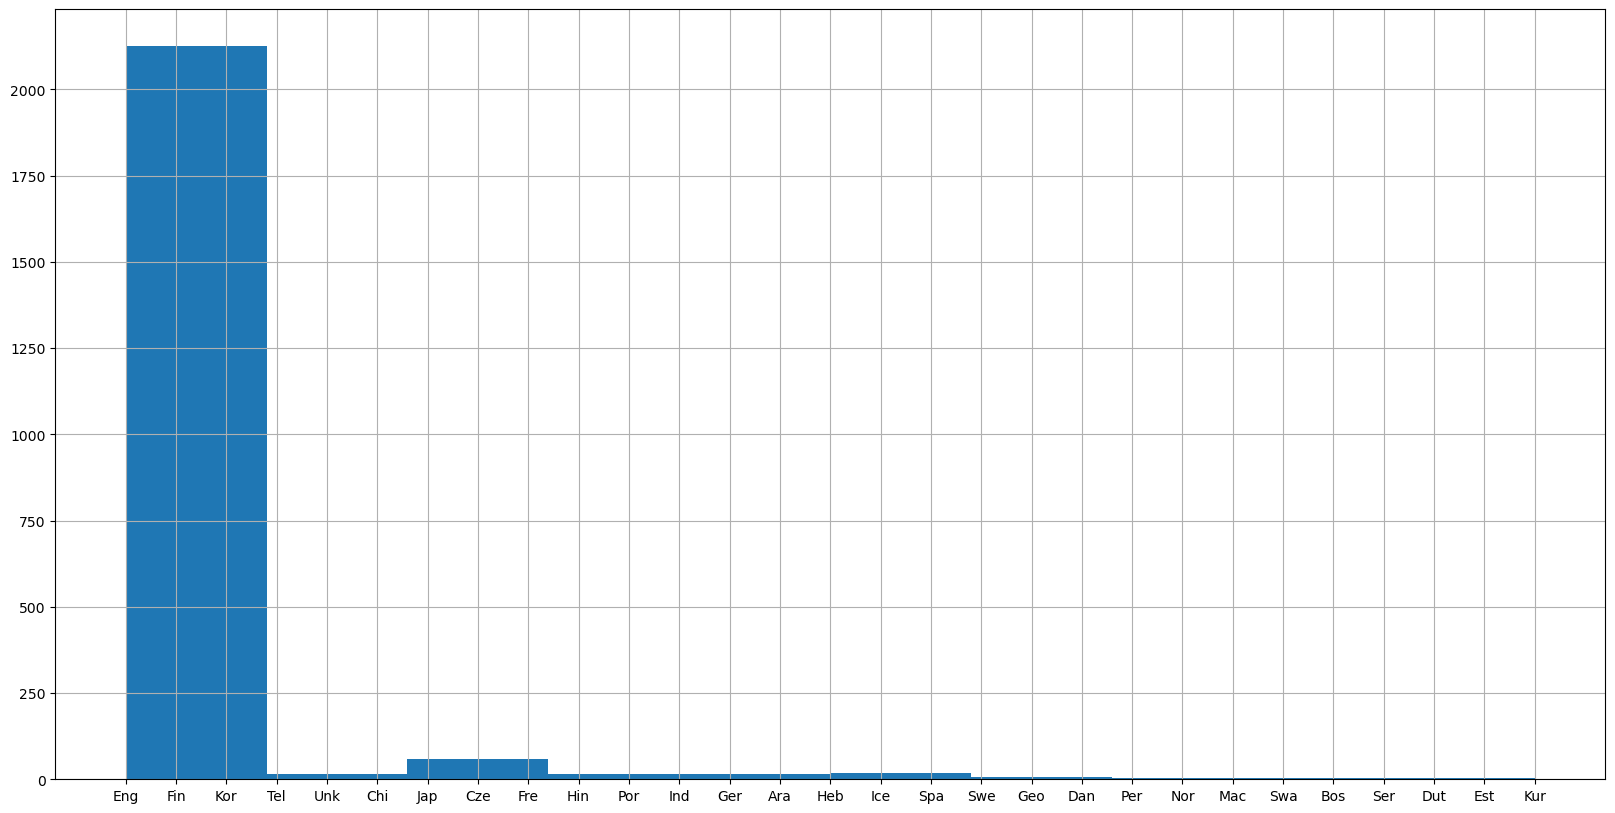

In [13]:

plt.figure(figsize=(20, 10))
medium_movies_data["Original Language"].hist()
plt.show()




<Figure size 1000x1000 with 0 Axes>

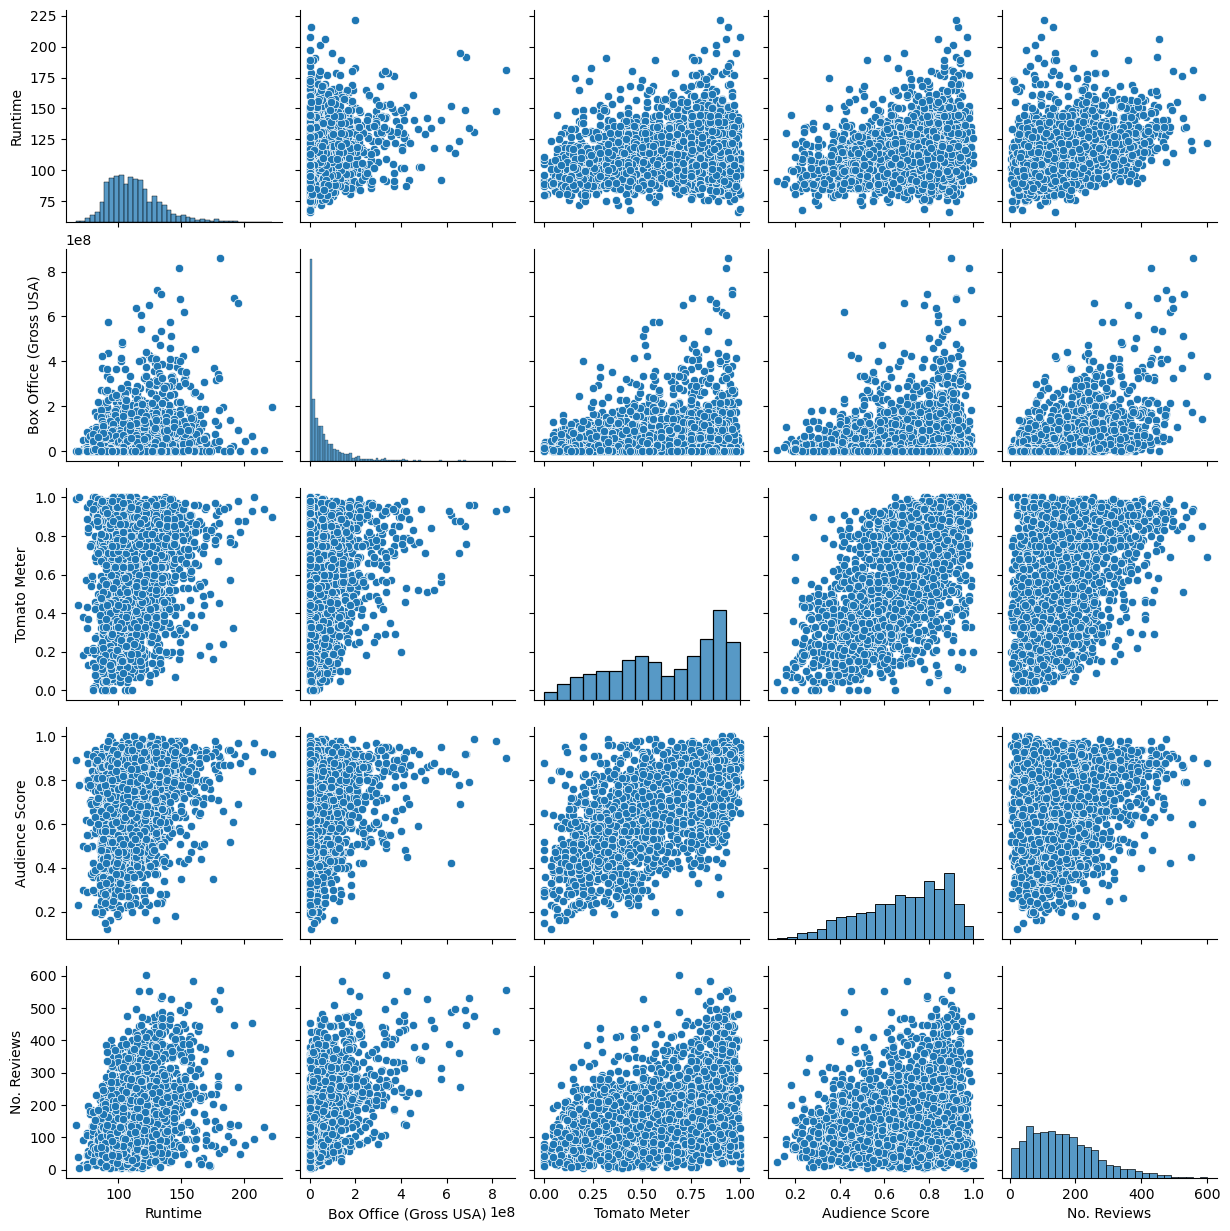

In [14]:

plt.figure(figsize=(10, 10))
sns.pairplot(medium_movies_data[q_features_s])
plt.show()


In [15]:


medium_movies_data.groupby(["Director", "Producer", "Writer"]).count()



,,,Title,Synopsis,Original Language,Runtime,Top Cast,Distributor,Production Co,Box Office (Gross USA),Tomato Meter,Audience Score,No. Reviews,Genre,Release Date (Theaters),Release Date (Streaming),Link,All Genres
Director,Producer,Writer,,,,,,,,,,,,,,,,
A.M. Lukas,"Julie Buck, Josh Hetzler, Josh Shader",Dan Schoffer,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
A.V. Rockwell,"Eddie Vaisman, Julia Lebedev, Lena Waithe, Rishi Rajani, Brad Weston",A.V. Rockwell,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Aaron Blaise, Robert Walker",Igor Khait,Tab Murphy,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Aaron Horvath, Michael Jelenic","Christopher Meledandri, Shigeru Miyamoto",Matthew Fogel,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Aaron Moorhead, Justin Benson","David Lawson Jr., Justin Benson, Aaron Moorhead, Thomas R. Burke, Leal Naim",Justin Benson,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zaza Urushadze,"Zaza Urushadze, Ivo Felt, Tatjana Mülbeier, Artur Veeber",Zaza Urushadze,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Zhang-Ke Jia,Shozo Ichiyama,Zhang-Ke Jia,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Zoe Clarke-Williams,Frank Mancuso Jr.,"Victoria Strouse, Scott Ferraiolo",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [16]:


medium_movies_data.shape



(2262, 19)

In [17]:


medium_data_a



,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,0.0.9,...,0.0.2189,0.0.2190,0.0.2191,0.0.2192,0.0.2193,0.0.2194,0.0.2195,0.0.2196,0.0.2197,0.0.2198
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.083333,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.083333,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2226,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2227,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2228,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:

medium_data_df_a




,Unnamed: 0,The Color Purple,The Beekeeper 2024,Aquaman And The Lost Kingdom,Napoleon 2023,Uncharted 2022,Fast X,Transformers Rise Of The Beasts,Star Wars The Rise Of Skywalker,Bullet Train 2022,...,Maverick,Damsel,The Wind 2019,The Good The Bad The Weird,Meeks Cutoff,In A Valley Of Violence,The Rider,Blackthorn,The Keeping Room,Marlina The Murderer In Four Acts
0,The Color Purple,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,The Beekeeper 2024,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aquaman And The Lost Kingdom,0.0,0.0,0.0,0.0,0.0,0.083333,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Napoleon 2023,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Uncharted 2022,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226,In A Valley Of Violence,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2227,The Rider,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2228,Blackthorn,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2229,The Keeping Room,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


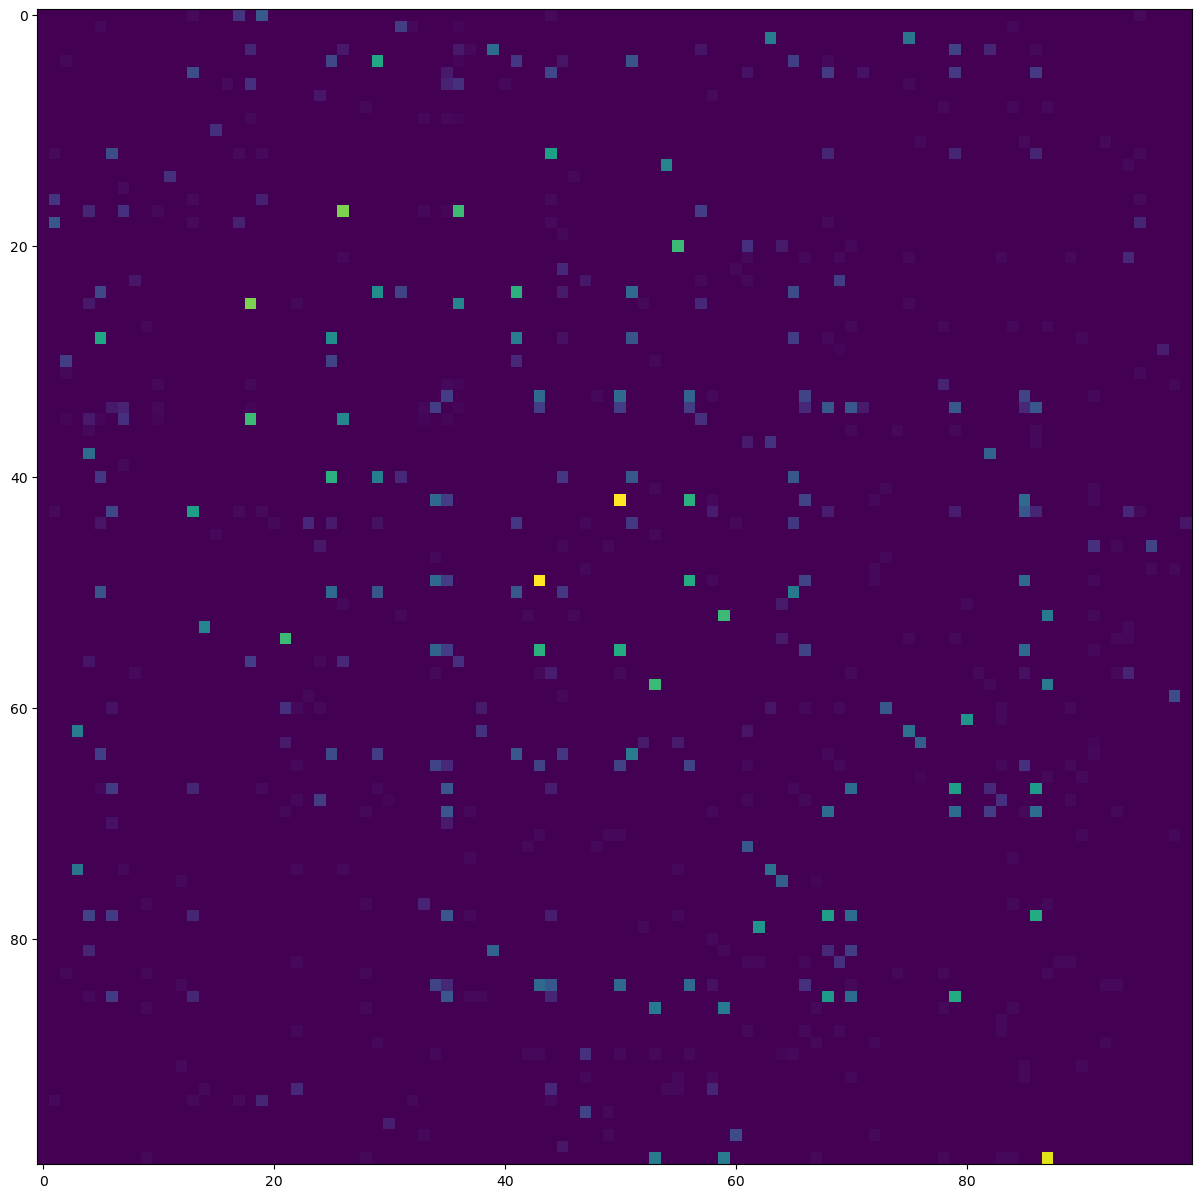

In [19]:

plt.figure(figsize=(15, 15))
plt.imshow(medium_data_a.values[:100, :100])
plt.show()



In [48]:
a = medium_data_a.values

for i in range(a.shape[0]):
    print(i, sum(a[i, :]))

0 16.877680652680656
1 24.98315108094518
2 27.275974025974016
3 17.233549783549794
4 15.013477698771815
5 16.818638306138304
6 17.42209249084249
7 9.366472416472417
8 3.1336080586080577
9 12.61605706385118
10 24.506672494172456
11 4.636352740396853
12 10.791870629370626
13 13.206158424908427
14 25.210770479520455
15 8.733825896325895
16 22.99617465867462
17 27.440130539395263
18 7.826087801087797
19 8.377109002108998
20 17.74284188034187
21 14.233012820512826
22 7.037271062271062
23 19.00790598290598
24 20.619780219780218
25 28.175918444300773
26 12.67838827838827
27 12.563983238983226
28 20.61105006105006
29 8.227496626180836
30 17.150382460676575
31 8.410554029304029
32 10.007952668246785
33 24.05554029304028
34 30.075568385862518
35 24.25306282769516
36 19.182051282051276
37 10.844444444444445
38 14.515888278388278
39 8.278823953823956
40 20.538095238095238
41 10.812637362637362
42 36.28759157509152
43 13.016870629370636
44 13.705692918192916
45 19.29426982331393
46 12.9506715506715

In [51]:

input_data = pd.read_csv('../data/medium_data_a.csv', index_col=0)
input_data_df = pd.read_csv('../data/medium_data_df_a.csv', index_col=0)



In [52]:
with open("../data/medium_data_no_link_movies.pickle", "rb") as fp:
    no_link_medium = pickle.load(fp)

len(no_link_medium)

79

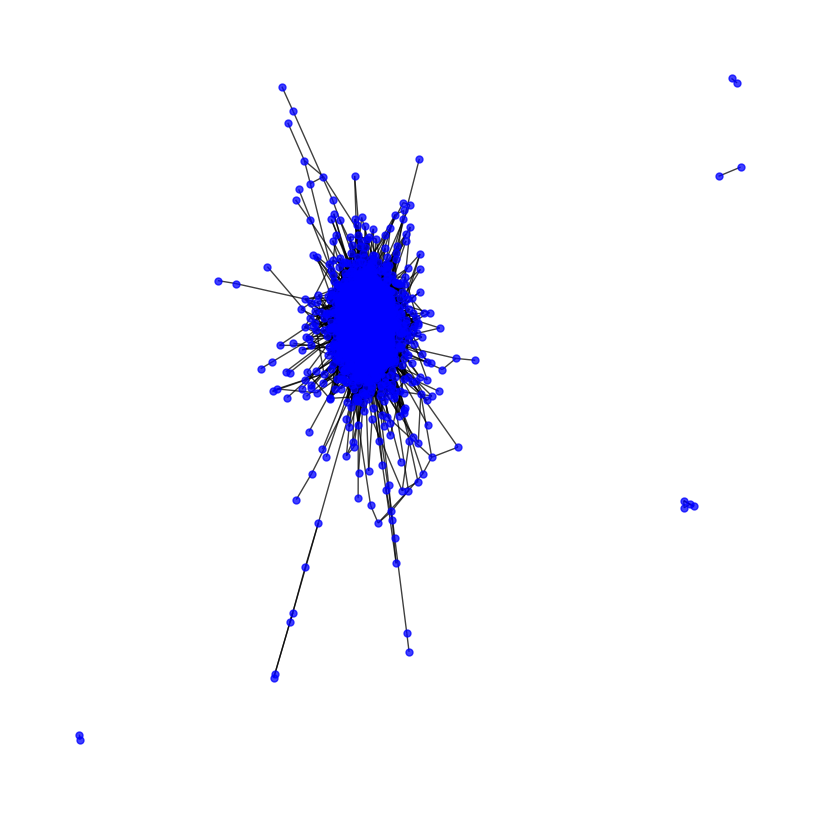

In [53]:

G = nx.Graph(input_data.values)

plt.figure(figsize=(8, 8))
nx.draw(G, node_size=25, node_color="blue", edge_color='black', alpha=0.75) 
plt.show()




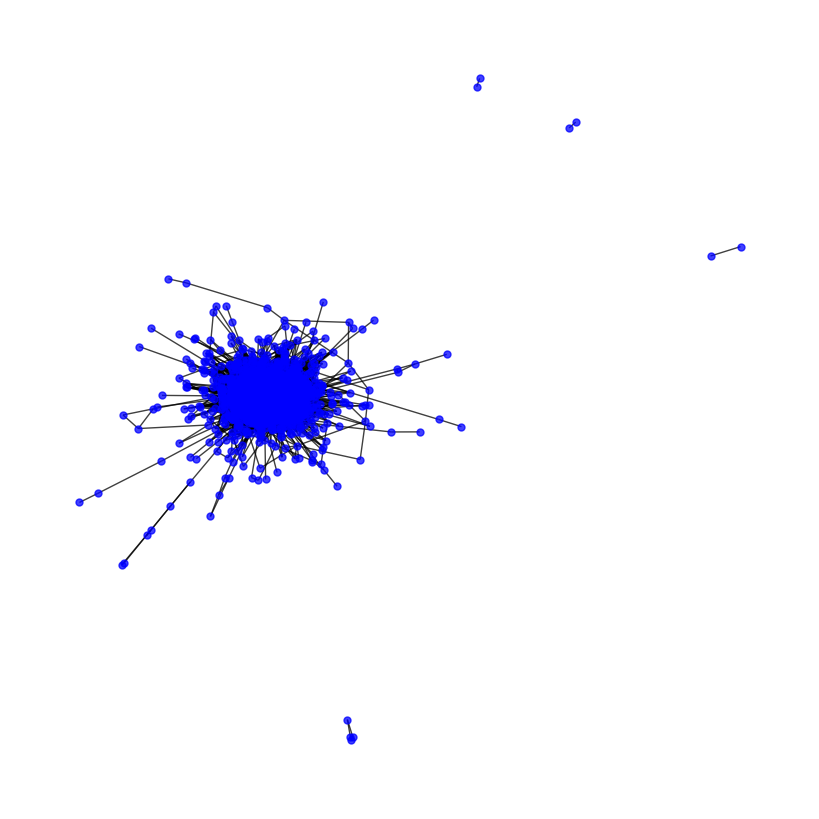

In [54]:


plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, node_size=25, node_color="blue", edge_color='black', alpha=0.75) 
plt.show()



In [ ]:


plt.figure(figsize=(8, 8))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos=pos, node_size=25, node_color="blue", edge_color='black', alpha=0.75) 
plt.show()


In [ ]:


plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, node_size=25, node_color="green", alpha=0.75) 
plt.show()


In [ ]:


plt.figure(figsize=(8, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, node_size=25, node_color="blue", edge_color='black', alpha=0.75) 
plt.show()




In [ ]:


import networkx as nx
from mpl_toolkits.mplot3d import Axes3D

# The graph to visualize
G = nx.Graph(input_data.values)

# 3d spring layout
pos = nx.spring_layout(G, dim=3, seed=779)

# Extract node and edge positions from the layout
node_xyz = np.array([pos[v] for v in sorted(G)])
edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

# Create the 3D figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")

# Plot the nodes - alpha is scaled by "depth" automatically
ax.scatter(*node_xyz.T, s=25, ec="w", color="b")

# Plot the edges
for vizedge in edge_xyz:
    ax.plot(*vizedge.T, color="tab:gray")


def _format_axes(ax):
    """Visualization options for the 3D axes."""
    # Turn gridlines off
    ax.grid(False)
    # Suppress tick labels
    for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
        dim.set_ticks([])
    # Set axes labels
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")


_format_axes(ax)
fig.tight_layout()
plt.show()





# Data with around 4,000 movies


In [ ]:
large_movies_data = pd.read_csv("../data/large_movies_data.csv", )
large_data_df_a = pd.read_csv("../data/large_data_df_a.csv", )
large_data_a = pd.read_csv("../data/large_data_a.csv", )

print(large_movies_data.shape, large_data_df_a.shape, large_data_a.shape)



In [ ]:
with open("../data/large_data_no_link_movies.pickle", "rb") as fp:
    no_link_large = pickle.load(fp)

len(no_link_large)

In [ ]:


features_m = [
    'Title', 'Synopsis', 'Original Language', 'Runtime', 
    'Director', 'Producer', 'Writer', 'Top Cast',
    'Distributor', 'Production Co', 
    'Box Office (Gross USA)', 
    'Tomato Meter', 'Audience Score', 'No. Reviews', 'Genre', 
    'Release Date (Theaters)', 'Release Date (Streaming)', 'Link'
]

q_features_m = ['Runtime', 'Tomato Meter', 'Audience Score', 'No. Reviews', ]

c_features_m = ['Original Language', 'Genre',]

network_columns_m = [ 'Director', 'Producer', 'Writer', 'Top Cast']



In [ ]:



corr_m = large_movies_data[q_features_m].corr()
plt.figure(figsize=(10, 10))
plt.imshow(corr_m)
plt.xticks(range(len(corr_m.columns)), corr_m.columns)
plt.yticks(range(len(corr_m.columns)), corr_m.columns)
plt.colorbar()
plt.title("with ~4K movies")
plt.show()




In [ ]:


large_movies_data["Genre"].unique()


In [ ]:

plt.figure(figsize=(25, 10))
large_movies_data["Genre"].hist()
plt.show()


In [ ]:


plt.figure(figsize=(20, 10))
large_movies_data["Original Language"].hist()
plt.show()



In [ ]:



plt.figure(figsize=(10, 10))
sns.pairplot(large_movies_data[q_features_m])
plt.show()



In [ ]:

large_movies_data.groupby(["Director", ]).count()



In [ ]:

plt.figure(figsize=(15, 15))
plt.imshow(large_data_a.values[:100, :100])
plt.show()



In [ ]:


b = large_data_a.values

for i in range(b.shape[0]):
    print(i, sum(b[i, :]))

In [ ]:

input_data_ = pd.read_csv('../data/large_data_a.csv', index_col=0)



In [ ]:

G_ = nx.Graph(input_data_.values)

plt.figure(figsize=(12, 12))
nx.draw(G_, node_size=25, node_color="blue", edge_color='black', alpha=0.75) 
plt.show()



In [ ]:



plt.figure(figsize=(8, 8))
pos_ = nx.spring_layout(G_)
nx.draw(G_, pos=pos_, node_size=25, node_color="blue", edge_color='black', alpha=0.75) 
plt.show()



In [ ]:

plt.figure(figsize=(8, 8))
pos__ = nx.kamada_kawai_layout(G_)
nx.draw(G_, pos=pos__, node_size=25, node_color="blue", edge_color='black', alpha=0.75) 

plt.show()



In [ ]:




import networkx as nx
from mpl_toolkits.mplot3d import Axes3D

# The graph to visualize
G = nx.Graph(input_data_.values)

# 3d spring layout
pos = nx.spring_layout(G, dim=3, seed=779)

# Extract node and edge positions from the layout
node_xyz = np.array([pos[v] for v in sorted(G)])
edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

# Create the 3D figure
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="3d")

# Plot the nodes - alpha is scaled by "depth" automatically
ax.scatter(*node_xyz.T, s=25, ec="w", color="b")

# Plot the edges
for vizedge in edge_xyz:
    ax.plot(*vizedge.T, color="tab:gray")


def _format_axes(ax):
    """Visualization options for the 3D axes."""
    # Turn gridlines off
    ax.grid(False)
    # Suppress tick labels
    for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
        dim.set_ticks([])
    # Set axes labels
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")


_format_axes(ax)
fig.tight_layout()
plt.show()


